<H1> KIPA PROJECT </H1>
<H3> MDSSB-DSAI-01 DIGITAL TRANSFORMATION </H3>
Aiman Alam | Modou Lamin Manjang | Husnain Dawood | Niloufar Shokri | Sergey Polyarus | Suraj Karakulath

We want to find correlations/patterns between the price of waste (bought from suppliers) and various potential price determinants such as weather, energy, business cycle, Euwid and Quantities.

In [159]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime
from statsmodels.tsa.tsatools import lagmat

In [81]:
#Pricing dataset 
df = pd.read_excel('df.xlsx')
#df.head()

## Quick Exploration of Pricing Dataset

In [82]:
#df.info()

There are no null values in any of the 3379 observations.

In [83]:
#df['Plz'].unique()

In [84]:
#len(df['Plz'].unique())

There are 10 unique clusters.

In [85]:
#df['full'].unique()

And 4 unique product categories.

"['10', '11', '12', '13', '14', '15', '16']", "['48', '49']"

We explore a few clusters by splitting among ourselves. To start with, we split as:

- Nilou: ['25', '24']", "['26', '27', '28']", "['20', '21', '22', '23']
- Aiman: "['29', '30', '31', '38', '39']
- Suraj: "['10', '11', '12', '13', '14', '15', '16']", "['48', '49']
- Momo: "['1', '4', '6', '7', '8', '9']

### Cluster '25','24'

Looking at the **['25','24'] ** cluster for the **product category 'A2 -  geschreddert'** first.

In [86]:
TS1 = df[(df['Plz'] == "['25', '24']")]
#TS1.head()

In [87]:
fig = px.line(TS1, x='date', y='wPreis', color='full', title='Weekly Prices for [25,24] by Category')
fig.show()

It is interesting to note that the wPreis for all 3 categories in the same cluster are somewhat correlated, with occasional deviations. This need not be so but the fact that it is happens to be a non-trivial insight.

### Cluster '26', '27', '28'

In [88]:
TS2 = df[(df['Plz'] == "['26', '27', '28']")]
#TS2.tail()

In [89]:
fig = px.line(TS2, x='date', y='wPreis', color='full', title='Weekly Prices for [26,27,28] by Category')
fig.show()

### Cluster '20', '21', '22', '23'

In [90]:
TS3 = df[(df['Plz'] == "['20', '21', '22', '23']")]

fig = px.line(TS3, x='date', y='wPreis', color='full', title='Weekly Prices for [20,21,22,23] by Product Category')
fig.show()

### Cluster '10', '11', '12', '13', '14', '15', '16'

In [91]:
TS4 = df[(df['Plz'] == "['10', '11', '12', '13', '14', '15', '16']")]  
fig = px.line(TS4, x='date', y='wPreis', color='full', title='Weekly Prices for [10, 11, 12, 13, 14, 15, 16] by Category')
fig.show()

### Cluster '48', '49'

In [92]:
TS5 = df[(df['Plz'] == "['48', '49']")]  
fig = px.line(TS5, x='date', y='wPreis', color='full', title='Weekly Prices for [48, 49] by Category')
fig.show()

### Cluster '1', '4', '6', '7', '8', '9'

In [93]:
TS7 = df[(df['Plz'] == "['1', '4', '6', '7', '8', '9']")]  
#TS7.head()


In [94]:
fig = px.line(TS7, x='date', y='wPreis', color='full', title='Weekly Prices for [1, 4, 6, 7, 8, 9] by Category')
fig.show()

Interestingly for 7th cluster, [1, 4, 6, 7, 8, 9] just like the forth cluster, there is only one waste category, *A1 & A2*


### Cluster '40', '41', '42', '44', '45', '46', '47'

In [95]:
TS8 = df[(df['Plz'] == "['40', '41', '42', '44', '45', '46', '47']")]  
#TS8.head()


In [96]:
fig = px.line(TS8, x='date', y='wPreis', color='full', title='Weekly Prices for [40, 41, 42, 44, 45 46, 47] by Category')
fig.show()

As before, the wPreis of categories in the same cluster follow a similar series, almost identical.

<h2> Exploring Potential Price Determinants </h2>

### 1. Energy (Electricity, Oil and Gas)

####  Oil first. 

- We do not have access to any data that has oil prices per region in Germany (it may not make sense either)
- So we look at Global Oil and Gas Market Prices as a proxy from Yahoo finance https://finance.yahoo.com/quote/CL%3DF/history?period1=1599436800&period2=1694649600&interval=1wk&filter=history&frequency=1wk&includeAdjustedClose=true   (No download option but can copy and paste into excel)
- And *assume that relative changes in global prices have a proportional impact on the same prices in Germany*

In [97]:
#Oil
oil = pd.read_excel('Crude_oil.xlsx')
oil.head() 

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Sep 11, 2023",87.40,89.64,86.71,88.52,88.52,974.662
1,"Sep 04, 2023",86.06,88.08,85.02,87.51,87.51,"1,325,196"
2,"Aug 28, 2023",80.15,86.06,79.34,85.55,85.55,"1,619,479"
3,"Aug 21, 2023",81.43,82.47,77.59,79.83,79.83,"1,542,148"
4,"Aug 14, 2023",83.09,83.20,78.95,81.25,81.25,"1,269,633"


When exploring correlations between weekly oil prices and the price of another commodity like waste, the "Close" or "Adj Close" price is often used.

**Close Price**: The "Close" price represents the closing price of the commodity for a specific trading day. It is the last price at which a trade occurred before the market closed for that day. This is a commonly used price metric for historical price analysis.

**Adjusted Close Price (Adj Close)**: The "Adj Close" price accounts for events such as stock splits and dividend payments. It is often considered more accurate for long-term analysis because it adjusts for corporate actions that can affect the price. In the context of Crude Oil, if there are similar adjustments, the "Adj Close" can be a better choice for long-term correlations.

In [98]:
#oil.info()

158 entries for each week and no null values.

Transformation: Date here is in an object format so we convert it to datetime64[ns]

In [99]:
oil["Date"] = pd.to_datetime(oil["Date"])

In [100]:
oil.sort_values(by='Date')

,Date,Open,High,Low,Close*,Adj Close**,Volume
157,2020-09-07,39.48,39.59,36.13,37.33,37.33,"1,907,673"
156,2020-09-14,37.32,41.49,36.82,41.11,41.11,"1,430,611"
155,2020-09-21,40.98,41.27,38.66,40.25,40.25,"1,171,773"
154,2020-09-28,40.07,40.80,36.63,37.05,37.05,"1,781,188"
153,2020-10-05,37.00,41.47,37.00,40.60,40.60,"1,953,665"
...,...,...,...,...,...,...,...
4,2023-08-14,83.09,83.20,78.95,81.25,81.25,"1,269,633"
3,2023-08-21,81.43,82.47,77.59,79.83,79.83,"1,542,148"
2,2023-08-28,80.15,86.06,79.34,85.55,85.55,"1,619,479"
1,2023-09-04,86.06,88.08,85.02,87.51,87.51,"1,325,196"


#### Distribution of crude oil prices (Adj Close)

Quick look at the distribution of crude oil prices (Adj Close)

In [101]:
fig = px.line(oil, x='Date', y='Adj Close**', title='Weekly Adjusted Close Price for Crude Oil')
fig.show()

#### Correlation of Adj Close Price with the wPreis of only one of the clusters (48,49)

Now exploring the correlation of this Adjusted Close Price with the wPreis of **only one of the clusters (48,49):**
For this we combine the 2 dataframes (TS5 and oil) - INNER JOIN by the 'date' variable in TS5 and 'Date' variable in oil (which has been transformed)

In [102]:
combined_df = pd.merge(TS5[['date', 'wPreis', 'full']], oil[['Date', 'Adj Close**']], left_on='date', right_on='Date', how='inner')
# And drop the duplicate 'Date' column 
combined_df = combined_df.drop(columns='Date')
#combined_df


In [103]:
# Get unique categories
categories = combined_df['full'].unique()

# Create a Plotly figure
fig = go.Figure()

# Loop through each category and add a trace for it
for category in categories:
    category_data = combined_df[combined_df['full'] == category]
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['wPreis'], mode='lines', name=f'wPreis ({category})'))
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['Adj Close**'], mode='lines', name=f'Adj Close** ({category})'))

# Customize the layout
fig.update_layout(
    title="Time Series Comparison by Category for the cluster [48,49]",
    xaxis_title="Date",
    yaxis_title="Value",
    xaxis=dict(type='date'),
)

# Show the legend
fig.update_layout(showlegend=True)

# Display the plot
fig.show()

Some quick observations (purely from visualization):
- The wPreis and Adj Close price of Crude oil for both categories seem to be **closely correlated from Sep 2020 to around Jan 2022**. 
- For **Category A3 - geschreddert**, the correlation roughly continues *until June 2022* after which it becomes an **inverse correlation** until December 2022 and then low correlation until Sep 2023
- For **Category A2 & A3 - geschreddert**, the correlation continues from Jan 2022 to around March 2022 after which they slowly become inverse correlated until Dec 2022, and similar to the other category, loses the correlation after that.

Something remained consistent until Jan 2022. After that things began going in the opposite direction. And from Dec 2022 onwards they become less correlated.

More investigation needed to explore further.

#### Electricity next.
The data is *available only from 1 Jan 2021*. The spot market prices arise or are calculated from the hourly prices and quantities of all electricity exchanges. And values are for Germany not regional.

In [104]:
elec = pd.read_csv('electricity.csv', sep=';')
#elec.head() 

In [105]:
#elec.info()

There are 23351 entries and it makes sense as it is hourly data from Jan 1 2021 (24 hours x (2 years + 8 months + 21 days until Sep 21).

Quick visual exploration. For this, we need to convert Datum to date-time format.

In [106]:
elec["Datum"] = pd.to_datetime(elec["Datum"])

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/44262613.py:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [107]:
#elec.tail()

In [108]:
#elec.info()

#### IMPORTANT: The values of Spotmarktpreis in ct/kWh are in German standard - i.e. comma as decimal. So these need to be converted into decimals.

In [109]:
# Replace commas with periods in the 'Spotmarktpreis in ct/kWh' column and Converting prices into float variables
elec['Spotmarktpreis in ct/kWh'] = elec['Spotmarktpreis in ct/kWh'].str.replace(',', '.').astype(float)
#elec.head()


In [110]:
#elec.tail()

Some cleaning and transformation needed to get a proper datetime variable from combining the date (Datum) and von (hour) variables.

In [111]:
# Convert 'Datum' and 'von' to datetime separately and then combine them
elec['von'] = pd.to_datetime(elec['von'], format='%H:%M')
#elec.head()

In [112]:
# # Extract the time part without the date component
elec['von'] = elec['von'].dt.strftime('%H:%M:%S')
#elec.head()

In [113]:
elec['combined_datetime'] = elec['Datum'] + pd.to_timedelta(elec['von'].astype(str))
#elec.head()

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/1528065869.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



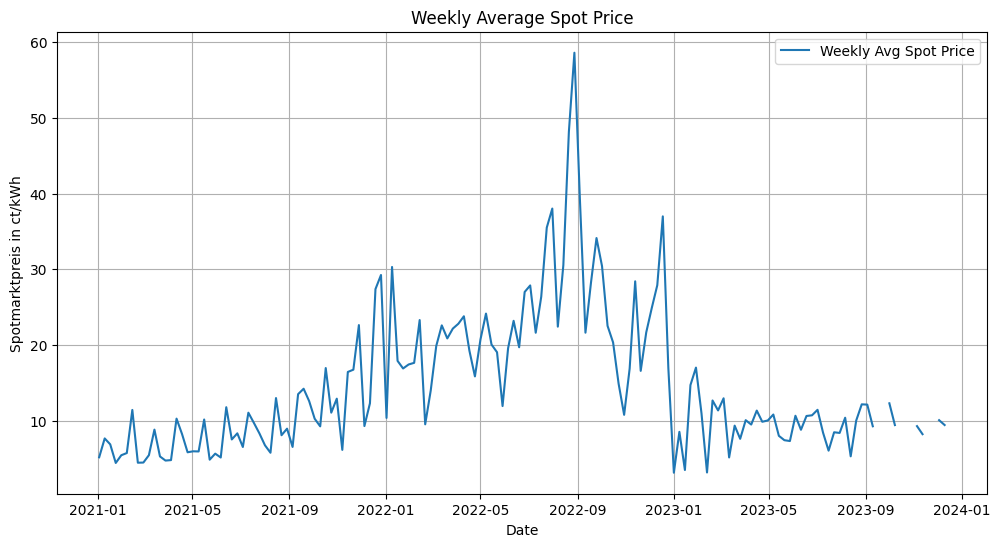

In [114]:
# Resample data to weekly averages
weekly_avg = elec.resample('W', on='combined_datetime').mean()

# Plot the weekly averages
plt.figure(figsize=(12, 6))
plt.plot(weekly_avg.index, weekly_avg['Spotmarktpreis in ct/kWh'], label='Weekly Avg Spot Price')
plt.xlabel('Date')
plt.ylabel('Spotmarktpreis in ct/kWh')
plt.title('Weekly Average Spot Price')
plt.grid(True)
plt.legend()
plt.show()

#### Question: Why are there values for Spotmarktpreis in ct/kWh beyond today's date, such as into December? Are they forecasts?

In [115]:
weekly_avg.reset_index(inplace=True)


In [116]:
weekly_avg

,combined_datetime,Spotmarktpreis in ct/kWh
0,2021-01-03,5.187889
1,2021-01-10,7.676268
2,2021-01-17,6.894625
3,2021-01-24,4.438315
4,2021-01-31,5.455792
...,...,...
149,2023-11-12,8.238292
150,2023-11-19,NaN
151,2023-11-26,NaN
152,2023-12-03,10.086139


#### Correlation of Spotmarktpreis in ct/kWh with wPreis for the ['48', '49'] cluster

In [117]:
TS5

,week,wPreis,Plz,full,date
1854,2020-37,-29.244584,"['48', '49']",A3 - geschreddert,2020-09-14
1855,2020-38,-27.878925,"['48', '49']",A3 - geschreddert,2020-09-21
1856,2020-39,-25.077400,"['48', '49']",A3 - geschreddert,2020-09-28
1857,2020-40,-25.663645,"['48', '49']",A3 - geschreddert,2020-10-05
1858,2020-41,-24.004958,"['48', '49']",A3 - geschreddert,2020-10-12
...,...,...,...,...,...
2149,2023-32,17.044359,"['48', '49']",A2 & A3 - geschreddert,2023-08-07
2150,2023-33,4.038512,"['48', '49']",A2 & A3 - geschreddert,2023-08-14
2151,2023-34,4.426446,"['48', '49']",A2 & A3 - geschreddert,2023-08-21
2152,2023-35,5.545975,"['48', '49']",A2 & A3 - geschreddert,2023-08-28


New problem is that the weekly 'date' values in TS5 with the 14th of Sep and the combined_datetime values in weekly_avg may be starting with a different date. So we need a key that can be used to merge both, like the week number.

In [118]:
# Create a new column 'weekno' representing the week number
TS5['weekno'] = TS5['date'].dt.strftime('%U-%Y')  # Format: WeekNumber-Year
TS5

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/2907048329.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,week,wPreis,Plz,full,date,weekno
1854,2020-37,-29.244584,"['48', '49']",A3 - geschreddert,2020-09-14,37-2020
1855,2020-38,-27.878925,"['48', '49']",A3 - geschreddert,2020-09-21,38-2020
1856,2020-39,-25.077400,"['48', '49']",A3 - geschreddert,2020-09-28,39-2020
1857,2020-40,-25.663645,"['48', '49']",A3 - geschreddert,2020-10-05,40-2020
1858,2020-41,-24.004958,"['48', '49']",A3 - geschreddert,2020-10-12,41-2020
...,...,...,...,...,...,...
2149,2023-32,17.044359,"['48', '49']",A2 & A3 - geschreddert,2023-08-07,32-2023
2150,2023-33,4.038512,"['48', '49']",A2 & A3 - geschreddert,2023-08-14,33-2023
2151,2023-34,4.426446,"['48', '49']",A2 & A3 - geschreddert,2023-08-21,34-2023
2152,2023-35,5.545975,"['48', '49']",A2 & A3 - geschreddert,2023-08-28,35-2023


In [119]:
weekly_avg

,combined_datetime,Spotmarktpreis in ct/kWh
0,2021-01-03,5.187889
1,2021-01-10,7.676268
2,2021-01-17,6.894625
3,2021-01-24,4.438315
4,2021-01-31,5.455792
...,...,...
149,2023-11-12,8.238292
150,2023-11-19,NaN
151,2023-11-26,NaN
152,2023-12-03,10.086139


In [120]:
# Create a new column 'weekno' representing the week number
weekly_avg['weekno'] = weekly_avg['combined_datetime'].dt.strftime('%U-%Y')  # Format: WeekNumber-Year
weekly_avg

,combined_datetime,Spotmarktpreis in ct/kWh,weekno
0,2021-01-03,5.187889,01-2021
1,2021-01-10,7.676268,02-2021
2,2021-01-17,6.894625,03-2021
3,2021-01-24,4.438315,04-2021
4,2021-01-31,5.455792,05-2021
...,...,...,...
149,2023-11-12,8.238292,46-2023
150,2023-11-19,NaN,47-2023
151,2023-11-26,NaN,48-2023
152,2023-12-03,10.086139,49-2023


In [121]:
# Merge 'TS5' and 'elec' based on the 'week' column
combined_elect = pd.merge(TS5, weekly_avg, on='weekno', how='inner')
combined_elect

,week,wPreis,Plz,full,date,weekno,combined_datetime,Spotmarktpreis in ct/kWh
0,2020-53,-30.855857,"['48', '49']",A3 - geschreddert,2021-01-04,01-2021,2021-01-03,5.187889
1,2021-01,-28.406423,"['48', '49']",A3 - geschreddert,2021-01-04,01-2021,2021-01-03,5.187889
2,2020-53,-30.855857,"['48', '49']",A2 & A3 - geschreddert,2021-01-04,01-2021,2021-01-03,5.187889
3,2021-01,-28.406423,"['48', '49']",A2 & A3 - geschreddert,2021-01-04,01-2021,2021-01-03,5.187889
4,2021-02,-28.517571,"['48', '49']",A3 - geschreddert,2021-01-11,02-2021,2021-01-10,7.676268
...,...,...,...,...,...,...,...,...
265,2023-34,4.426446,"['48', '49']",A2 & A3 - geschreddert,2023-08-21,34-2023,2023-08-20,10.042887
266,2023-35,5.545975,"['48', '49']",A3 - geschreddert,2023-08-28,35-2023,2023-08-27,12.177613
267,2023-35,5.545975,"['48', '49']",A2 & A3 - geschreddert,2023-08-28,35-2023,2023-08-27,12.177613
268,2023-36,8.037723,"['48', '49']",A3 - geschreddert,2023-09-04,36-2023,2023-09-03,12.140506


In [122]:
combined_elect.drop(columns=['week','date','combined_datetime'], inplace=True)
combined_elect.sort_values(by='weekno')

,wPreis,Plz,full,weekno,Spotmarktpreis in ct/kWh
0,-30.855857,"['48', '49']",A3 - geschreddert,01-2021,5.187889
1,-28.406423,"['48', '49']",A3 - geschreddert,01-2021,5.187889
2,-30.855857,"['48', '49']",A2 & A3 - geschreddert,01-2021,5.187889
3,-28.406423,"['48', '49']",A2 & A3 - geschreddert,01-2021,5.187889
107,14.319133,"['48', '49']",A2 & A3 - geschreddert,01-2022,10.383893
...,...,...,...,...,...
204,72.442489,"['48', '49']",A3 - geschreddert,51-2022,36.989869
104,16.345424,"['48', '49']",A3 - geschreddert,52-2021,29.253595
105,13.879043,"['48', '49']",A2 & A3 - geschreddert,52-2021,29.253595
207,77.328708,"['48', '49']",A2 & A3 - geschreddert,52-2022,16.982190


In [123]:
# Group the data by 'week' and 'full' and calculate weekly means
grouped_data = combined_elect.groupby(['weekno', 'full']).mean().reset_index()

# Get unique categories from the 'full' column
categories = grouped_data['full'].unique()

# Create an empty list to store the data traces
data_traces_wPreis = []
data_traces_Spotmarktpreis = []

# Create traces for each category
for category in categories:
    data = grouped_data[grouped_data['full'] == category]
    
    trace_wPreis = go.Scatter(
        x=data['weekno'],
        y=data['wPreis'],
        mode='lines',
        name=f'wPreis - {category}',
        hoverinfo='x+y',
        yaxis='y1',
    )
    data_traces_wPreis.append(trace_wPreis)
    
    trace_Spotmarktpreis = go.Scatter(
        x=data['weekno'],
        y=data['Spotmarktpreis in ct/kWh'],
        mode='lines',
        name=f'Spotmarktpreis - {category}',
        hoverinfo='x+y',
        yaxis='y2',
    )
    data_traces_Spotmarktpreis.append(trace_Spotmarktpreis)

# Create layout for the plot with dual y-axes
layout = go.Layout(
    title="Time Series of wPreis and Spotmarktpreis",
    xaxis=dict(title="Week No"),
    yaxis=dict(title="wPreis", side='left', showgrid=False),
    yaxis2=dict(title="Spotmarktpreis in ct/kWh", side='right', overlaying='y', showgrid=False),
    showlegend=True,
)

# Create the Plotly figure with dual y-axes
fig = go.Figure(data=data_traces_wPreis + data_traces_Spotmarktpreis, layout=layout)

# Show the interactive Plotly plot
fig.show()

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/1036827681.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



This is wrong. Need to be redone.

#### Gas prices

Similar to oil, gas prices have been collected from https://finance.yahoo.com/quote/NG%3DF/history?p=NG%3DF and they are for the whole of Germany.

In [124]:
gas = pd.read_excel('gas.xlsx')
#gas.head() 

FileNotFoundError: [Errno 2] No such file or directory: 'gas.xlsx'

In [ ]:
gas["Date"] = pd.to_datetime(gas["Date"])

In [ ]:
fig = px.line(gas, x='Date', y='Adj Close**', title='Weekly Adjusted Close Price for Natural Gas')
fig.show()

In [ ]:
combined_gas = pd.merge(TS5[['date', 'wPreis', 'full']], gas[['Date', 'Adj Close**']], left_on='date', right_on='Date', how='inner')
# And drop the duplicate 'Date' column 
combined_gas = combined_gas.drop(columns='Date')
#combined_gas


,date,wPreis,full,Adj Close**
0,2020-09-14,-29.244584,A3 - geschreddert,20480
1,2020-09-14,-29.244584,A2 & A3 - geschreddert,20480
2,2020-09-21,-27.878925,A3 - geschreddert,21390
3,2020-09-21,-27.878925,A2 & A3 - geschreddert,21390
4,2020-09-28,-25.077400,A3 - geschreddert,24380
...,...,...,...,...
295,2023-08-21,4.426446,A2 & A3 - geschreddert,25400
296,2023-08-28,5.545975,A3 - geschreddert,27650
297,2023-08-28,5.545975,A2 & A3 - geschreddert,27650
298,2023-09-04,8.037723,A3 - geschreddert,26050


In [ ]:
# # Get unique categories
# categories = combined_gas['full'].unique()

# # Create a Plotly figure
# fig = go.Figure()

# # Loop through each category and add a trace for it
# for category in categories:
#     category_data = combined_gas[combined_gas['full'] == category]
#     fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['wPreis'], mode='lines', name=f'wPreis ({category})'))
#     fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['Adj Close**'], mode='lines', name=f'Adj Close** ({category})'))

# # Customize the layout
# fig.update_layout(
#     title="Time Series Comparison by Category for the cluster [48,49]",
#     xaxis_title="Date",
#     yaxis_title="Value",
#     xaxis=dict(type='date'),
# )

# # Show the legend
# fig.update_layout(showlegend=True)

# # Display the plot
# fig.show()

In [ ]:
import plotly.subplots as sp

# Create a subplot with two y-axes
fig = sp.make_subplots(specs=[[{"secondary_y": True}]])

# Loop through each category and add traces for both 'wPreis' and 'Adj Close**'
for category in categories:
    category_data = combined_gas[combined_gas['full'] == category]
    
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['wPreis'], mode='lines', name=f'wPreis ({category})'))
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['Adj Close**'], mode='lines', name=f'Adj Close** ({category})', yaxis='y2'))

# Customize the layout
fig.update_layout(
    title="Time Series Comparison by Category for the cluster [48,49]",
    xaxis_title="Date",
    xaxis=dict(type='date'),
)

# Set y-axis titles
fig.update_yaxes(title_text="wPreis", secondary_y=False)
fig.update_yaxes(title_text="Adj Close**", secondary_y=True)

# Show the legend
fig.update_layout(showlegend=True)

# Display the plot
fig.show()

This shows that for gas, the correlation is not that much (as compared to some time periods with Oil). Best we can say is that the general trend is rising for both from Jan 2021 until around Dec 2022 and after that the wPreis continues to rise while gas prices rise sharply and fall sharply.

### 2. Weather (Wind, Temp)

To get the weather data, first we need to find the center of each ***Postleitzahl***.
Here are the centers based on <https://academickids.com/encyclopedia/index.php/List_of_postal_codes_in_Germany> and <https://simple.wikipedia.org/wiki/Postal_codes_in_Germany>:

- 20: Hamburg (53.5507,9.993)
- 21: Hamburg (53.5507,9.993), Elbinsel Wilhelmsburg (53.5067,9.9871), Kirchdorf (52.5952,8.8349), Reinbek (53.517,10.2488), Buchholz in der Nordheide (53.3264,9.8681), Stade (53.5934,9.4763), Freiburg/Elbe (53.8236,9.2854), Balje (53.8333,9.1333)
- 22: Hamburg (53.5507,9.993)
- 23: Lübeck (53.8689,10.6873), Plön (54.1624,10.4233)
- 24: Kiel (54.3213,10.1349), Altenholz (54.4,10.1333), Gettorf (54.4,9.9833), Eckernförde (54.4685,9.8382), Neumünster (54.0748,9.9819), Henstedt-Ulzburg (53.7903,10.0054), Kaltenkirchen (53.8329,9.9581), Bad Bramstedt (53.9183,9.8842), Nortorf (54.1674,9.8544), Hohenwestedt (54.0889,9.6536), Boostedt (54.0167,10.0333), Trappenkamp (54.0399,10.215), Rendsburg (54.3066,9.6631), Büdelsdorf (54.3184,9.673), Flensburg (54.7843,9.4396)
- 25: Uetersen (53.6877,9.6639), Tornesch (53.7,9.7167), Moorrege (53.6667,9.6667), Heidgraben (53.7079,9.681), Groß Nordende (53.7,9.65), Neuendeich (53.6833,9.6167), Marne (54.35,8.7667), Husum (54.4858,9.0524) , Schwabstedt (54.3971,9.1865)
- 26: Bad Zwischenahn (53.1833,8), Wilhelmshaven (53.53,8.1125), Aurich (53.4692,7.4823), Apen (53.2167,7.8), Leer (53.2316,7.461), Moormerland (53.3114,7.423), Rhauderfehn (53.1333,7.6167), Hesel (53.3,7.6), Jemgum (53.2667,7.3833), Elsfleth (53.2375,8.4566)
- 27: Steinkirchen (53.566,9.6111), Hollern-Twielenfleth (53.5998,9.5522)
- 28: Bremen (53.0758,8.8072)


In [ ]:
w_average_20212223 = pd.read_csv('w_average_20212223.csv')
#w_average_20212223.head()

,time,temperature_2m,windspeed_10m
0,2020-08-31,15.086667,12.055972
1,2020-09-07,15.696012,13.736131
2,2020-09-14,15.897143,9.828214
3,2020-09-21,14.293631,10.337440
4,2020-09-28,13.913393,13.442738


In [ ]:
fig = px.line(w_average_20212223, x='time', y='temperature_2m', title='Weekly Average temperature for [20,21,22,23]')
fig.show()

In [ ]:
fig = px.line(w_average_20212223, x='time', y='windspeed_10m', title='Weekly Average Windspeed for [20,21,22,23]')
fig.show()

In [ ]:
w_average_2425 = pd.read_csv('w_average_2425.csv')
#w_average_2425.head()

,time,temperature_2m,windspeed_10m
0,2020-08-31,14.895978,13.189757
1,2020-09-07,15.450050,15.893477
2,2020-09-14,15.376488,9.461508
3,2020-09-21,14.164906,10.715501
4,2020-09-28,14.034127,14.531374


In [ ]:
fig = px.line(w_average_2425, x='time', y='temperature_2m', title='Weekly Average temperature for [24,25]')
fig.show()

In [ ]:
fig = px.line(w_average_2425, x='time', y='windspeed_10m', title='Weekly Average Windspeed for [24,25]')
fig.show()

In [ ]:
w_average_262728 = pd.read_csv('w_average_262728.csv')
#w_average_262728.head()

,time,temperature_2m,windspeed_10m
0,2020-08-31,14.860043,11.411912
1,2020-09-07,15.506044,13.409341
2,2020-09-14,15.953388,10.843498
3,2020-09-21,14.099313,11.294643
4,2020-09-28,13.875549,14.582280


In [ ]:
fig = px.line(w_average_262728, x='time', y='temperature_2m', title='Weekly Average temperature for [26,27,28]')
fig.show()

In [ ]:
fig = px.line(w_average_262728, x='time', y='windspeed_10m', title='Weekly Average Windspeed for [26,27,28]')
fig.show()

### Business Cycle (DAX)

For Business Cycles, a key indication that we are using is the **DAX**. The DAX also known as *the Deutscher Aktien Index* or *the GER40* is a stock index that represent 40 of the largest and most liquid German companies that trade on the Frankfurt Exchange.

From the dataset, we will now extract the 7th Cluster, ['1', '4', '6', '7', '8', '9'] and dig in to see if that cluster has any corelation woth the DAX.

#### Cluster [1, 4, 6, 7, 8, 9]

In [125]:
TS7 = df[(df['Plz'] == "['1', '4', '6', '7', '8', '9']")]  
fig = px.line(TS7, x='date', y='wPreis', color='full', title='Weekly Prices for [1, 4, 6, 7, 8, 9] by Category')
fig.show()

#### Cluster '48', '49'

In [126]:
TS5 = df[(df['Plz'] == "['48', '49']")]  
fig = px.line(TS5, x='date', y='wPreis', color='full', title='Weekly Prices for [48, 49] by Category')
fig.show()

In [127]:
dax_df = pd.read_csv('DAX.csv')
#dax_df.head()
#dax_df.info()

In [128]:
dax_df["Date"] =pd.to_datetime(dax_df["Date"])
#dax_df.info()

In [130]:
dax_fig = px.line(dax_df, x='Date', y='Adj Close', title='Adj Close prices for DAX')
dax_fig.show()

Visually from the plot we can see that the adj close has a ver small range within the given time frame.

Now I want to extract the year and week number as per the original time series and drop the columns i dont need

In [131]:
dax_df['Year_week'] = dax_df['Date'].dt.strftime('%G-%V')
#dax_df.head(10)

In [132]:
dax_fig = px.scatter(dax_df, x='Year_week', y='Adj Close', title='Adj Close prices for DAX')
dax_fig.show()

In [133]:
#dax_df.set_index('Date', inplace=True)
weekly_avg = dax_df.resample('W', on='Date').mean()
#dax_df['Weekly_avg'] = dax_df.groupby('Year_week')['Adj Close'].mean()
#weekly_avg

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3706355420.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [134]:
dax_df = dax_df[['Date', 'Adj Close', 'Year_week', ]]
#dax_df.head()

In [137]:
dax_TS7 = pd.merge(TS7[['date', 'wPreis', 'full', 'week']], dax_df[['Date', 'Adj Close', 'Year_week']], left_on='date', right_on='Date', how='inner')
dax_TS5 = pd.merge(TS5[['date', 'wPreis', 'full', 'week']], dax_df[['Date', 'Adj Close', 'Year_week']], left_on='date', right_on='Date', how='inner')
dax_TS1 = pd.merge(TS1[['date', 'wPreis', 'full', 'week']], dax_df[['Date', 'Adj Close', 'Year_week']], left_on='date', right_on='Date', how='inner')
#dax_TS5.head()


Let now visualize the weekly price and the DAX over the same time period to see if there is any visual corelation

In [138]:

trace1 = go.Scatter(x=dax_TS7['date'], y=dax_TS7['wPreis'], mode='lines', name='Weekly Prices')
trace2 = go.Scatter(x=dax_TS7['date'], y=dax_TS7['Adj Close'], mode='lines', name='Adj Close')

data = [trace1, trace2]

layout = go.Layout(
    title='Time Series Comparison by Category for the cluster [1, 4, 6, 7, 8, 9] andthe daily DAX',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Value')
)

fig = go.Figure(data=data, layout=layout)
fig.show()


In [139]:
# Get unique categories
categories = dax_TS5['full'].unique()

# Create a Plotly figure
fig = go.Figure()

# Loop through each category and add a trace for it
for category in categories:
    category_data = dax_TS5[dax_TS5['full'] == category]
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['wPreis'], mode='lines', name=f'wPreis ({category})'))
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['Adj Close'], mode='lines', name=f'Adj Close ({category})'))

# Customize the layout
fig.update_layout(
    title="Time Series Comparison by Category for the cluster [48,49] and DAX",
    xaxis_title="Date",
    yaxis_title="Value",
    xaxis=dict(type='date'),
)

# Show the legend
fig.update_layout(showlegend=True)

# Display the plot
fig.show()

In [140]:
# Get unique categories
categories = dax_TS1['full'].unique()

# Create a Plotly figure
fig = go.Figure()

# Loop through each category and add a trace for it
for category in categories:
    category_data = dax_TS1[dax_TS1['full'] == category]
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['wPreis'], mode='lines', name=f'wPreis ({category})'))
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['Adj Close'], mode='lines', name='Adj Close '))

# Customize the layout
fig.update_layout(
    title="Time Series Comparison by Category for the cluster [25,24] and DAX",
    xaxis_title="Date",
    yaxis_title="Value",
    xaxis=dict(type='date'),
)

# Show the legend
fig.update_layout(showlegend=True)

# Display the plot
fig.show()

**Correlation**

From this plot, we can't really see a significant corelation, only a small negative corelation at some point when you zoom in. Let'scompute the actuall corelation 

In [141]:
correlation_df = pd.DataFrame(columns=['Category', 'Correlation', 'Clujster'])

# Calculate the correlation for each category
for category in dax_TS1['full'].unique():
    category_data = dax_TS1[dax_TS1['full'] == category]
    correlation = category_data['wPreis'].corr(category_data['Adj Close'])
    correlation_df = correlation_df.append({'Category': category, 'Correlation': correlation, 'Clujster': '25,24'}, ignore_index=True)

for category in dax_TS5['full'].unique():
    category_data = dax_TS5[dax_TS5['full'] == category]
    correlation = category_data['wPreis'].corr(category_data['Adj Close'])
    correlation_df = correlation_df.append({'Category': category, 'Correlation': correlation, 'Clujster': '48,49'}, ignore_index=True)

for category in dax_TS7['full'].unique():
    category_data = dax_TS7[dax_TS7['full'] == category]
    correlation = category_data['wPreis'].corr(category_data['Adj Close'])
    correlation_df = correlation_df.append({'Category': category, 'Correlation': correlation, 'Clujster': '1, 4, 6, 7, 8, 9'}, ignore_index=True)

# Display the correlation DataFrame
print(correlation_df)

                  Category  Correlation          Clujster
0       A2 -  geschreddert    -0.742500             25,24
1  A1 & A2 -  geschreddert    -0.718484             25,24
2  A2 & A3 -  geschreddert    -0.737670             25,24
3       A3 -  geschreddert    -0.660702             48,49
4  A2 & A3 -  geschreddert    -0.687785             48,49
5  A1 & A2 -  geschreddert    -0.449363  1, 4, 6, 7, 8, 9


/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/135459294.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/135459294.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/135459294.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/135459294.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/135459294.py:12: FutureWarning:

The frame.append method is deprecated

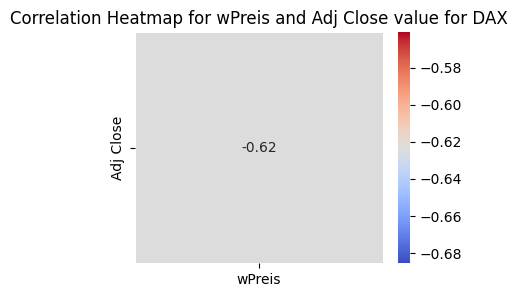

In [142]:
correlation = dax_TS7['wPreis'].corr(dax_TS5['Adj Close'])

plt.figure(figsize=(4, 3))
sns.heatmap([[correlation]], annot=True, cmap='coolwarm', linewidths=.5, xticklabels=['wPreis'], yticklabels=['Adj Close'])
plt.title('Correlation Heatmap for wPreis and Adj Close value for DAX')
plt.show()

Since there isn't any significant corelation on th *wPreis* and the *daily Close* value for the **DAX**

We will now lag the daily wPreis by a week and see if I will find a more or less significant corelation between the lagged wPreis and the DAX.

In [145]:
dax_price_df_lag = dax_TS7
dax_price_df_lag['wPreis_lagged_week'] = dax_price_df_lag['wPreis'].shift(1)

In [146]:

trace1 = go.Scatter(x=dax_price_df_lag['date'], y=dax_price_df_lag['wPreis_lagged_week'], mode='lines', name='Weekly Prices lagged')
trace2 = go.Scatter(x=dax_price_df_lag['date'], y=dax_price_df_lag['Adj Close'], mode='lines', name='Adj Close')

data = [trace1, trace2]

layout = go.Layout(
    title='Weekly Prices for [1, 4, 6, 7, 8, 9] Cluster vs the daily DAX',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Value')
)

fig = go.Figure(data=data, layout=layout)
fig.show()


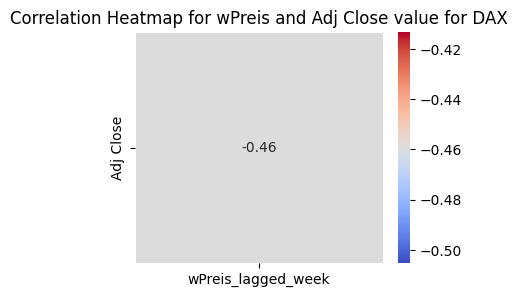

In [147]:
correlation = dax_price_df_lag['wPreis_lagged_week'].corr(dax_price_df_lag['Adj Close'])

plt.figure(figsize=(4, 3))
sns.heatmap([[correlation]], annot=True, cmap='coolwarm', linewidths=.5, xticklabels=['wPreis_lagged_week'], yticklabels=['Adj Close'])
plt.title('Correlation Heatmap for wPreis and Adj Close value for DAX')
plt.show()

At this point, we cannot deduce any strong corelation between Weekly prices(for product category A1 & A2) and the DAX.

## Construction

In [151]:
df = pd.read_excel('df.xlsx')
#making the df's for PLZ sets - naming them after the lander
#dropping redundant columns at the same time
needed_columns = ['week', 'wPreis', 'full']
Sch_Hol = df[df['Plz']=="['25', '24']"][needed_columns]
NS_HB = df[df['Plz']=="['26', '27', '28']"][needed_columns]
Sch_Ham = df[df['Plz']=="['20', '21', '22', '23']"][needed_columns]
NS = df[df['Plz']=="['29', '30', '31', '38', '39']"][needed_columns]
Ber_Bra = df[df['Plz']=="['10', '11', '12', '13', '14', '15', '16']"][needed_columns]
Sach = df[df['Plz']=="['1', '4', '6', '7', '8', '9']"][needed_columns]

#adding a datetime column and dropping the week column
lander_dfs = [Sch_Hol, NS_HB, Sch_Ham, NS, Ber_Bra, Sach]
for df in lander_dfs:
    df.loc[:,'Datetime'] = df.week.apply(lambda x: datetime.datetime.strptime(x+'-3', "%Y-%W-%w"))
    df.drop('week', inplace = True, axis=1)

In [156]:
#reading the df
baudf = pd.read_excel('Construction.xlsx').reset_index(drop=True)

#creating a months column
months = {
    'Januar': 1,
    'Februar': 2,
    'März': 3,
    'April': 4,
    'Mai': 5,
    'Juni': 6,
    'Juli': 7,
    'August': 8,
    'September': 9,
    'Oktober': 10,
    'November': 11,
    'Dezember': 12  
}
baudf['Month_number']=baudf['Month'].apply(lambda x: months[x])

#creating a week (YYYY-WW) column
baudf['Datetime']=(baudf['Year'].apply(str)+'-'+baudf['Month_number'].apply(str)+'-'+'28').apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))#.dt.isocalendar().week

#dropping redundant columns
baudf = baudf[['Land', 'Datetime', 'Value']]

In [157]:
def cutting_dfs(waste_price_df, construction_df):
    """Cuts the waste_price_df and construction_df so that their time series overlap and have the same length"""
    
    #reseting the indexes
    waste_price_df.reset_index(inplace=True, drop=True)
    construction_df.reset_index(inplace=True, drop=True)
   
    #getting and applying the window where the timeseries overlap
    earliest_date = waste_price_df.Datetime[0]
    latest_date = construction_df.Datetime.iloc[-6]
    waste_price_df = waste_price_df[(waste_price_df['Datetime']>=earliest_date)&(waste_price_df['Datetime']<=latest_date)]
    construction_df = construction_df[(construction_df['Datetime']>=earliest_date)&(construction_df['Datetime']<=latest_date)]
    construction_df.loc[:, 'Value'] = construction_df['Value'].astype('float32')

    return [waste_price_df, construction_df]

def same_length(waste_price_df, construction_df):
    """Forces the relevant timeseries to be of the same length"""

    #getting the month and year colums for waste_price_df
    waste_price_df.loc[:, 'Month'] = waste_price_df['Datetime'].apply(lambda x: x.month)
    waste_price_df.loc[:, 'Year'] = waste_price_df['Datetime'].apply(lambda x: x.year)
    #averaging the waste_price_df values by months and years
    waste_price_df = waste_price_df.groupby(['Month', 'Year', 'full']).mean().reset_index().sort_values(['full', 'Year', 'Month']).reset_index(drop=True)
    
    #sorting the average values by the waste type and creating a list of 
    if waste_price_df['full'].nunique()>1:
        waste_type_dfs = [waste_price_df[waste_price_df['full']==unique] for unique in waste_price_df['full'].unique()]
    else:
        waste_type_dfs = [waste_price_df]
       
    #considering a case when the waste_price_df has a row missing (Ber_Bra misses December'22)
    if waste_type_dfs[0].shape[0] != construction_df.shape[0]:
        #print(construction_df)
        construction_df.drop(index = 35, inplace=True)
      
    return [waste_type_dfs, construction_df]

def difference(waste_type_dfs, construction_df):
    """Helps to deal with differenced values"""
    waste_price_diff_dfs = []
    for waste_type_df in waste_type_dfs:
        waste_price_diff = np.diff(waste_type_df['wPreis'])
        waste_type_df = waste_type_df.iloc[1:, :]
        waste_type_df.loc[:, 'wPreis'] = waste_price_diff
        waste_price_diff_dfs.append(waste_type_df)

    construction_diff = np.diff(construction_df['Value'])
    construction_df = construction_df.iloc[1:, :]
    construction_df.loc[:, 'Value'] = construction_diff

    return [waste_price_diff_dfs, construction_df]

def lag(construction_df, lags=1):
    """Helps to deal with lagged values"""
    #print(construction_df.loc[:, 'Value'])
    construction_lagged = lagmat(construction_df['Value'].iloc[:-5], maxlag=lags, trim="forward", original='in')
    construction_df['Value'].iloc[:-5] = construction_lagged[:, lags]
    #print(construction_df.loc[:, 'Value'])
    return construction_df

def correlation(waste_type_dfs, construction_df, diff = False, lags = 0):
    """computes the correlation coefficients and prints them nicely"""
    for waste_type_df in waste_type_dfs:
        cc = waste_type_df['wPreis'].reset_index(drop=True).corr(construction_df['Value'].reset_index(drop=True), method='spearman')
        if diff:
            print(f'Corr. coeff. between the {waste_type_df.full.unique()[0]} differences and the differences of numbers of construction permits issues is', round(cc, 2))
        elif lags > 0:
            print(f'Corr. coeff. between the {waste_type_df.full.unique()[0]} prices and the lag-{lags} numbers of construction permits issues is', round(cc, 2))
        else:
            print(f'Corr. coeff. between the {waste_type_df.full.unique()[0]} prices and the number of construction permits issues is', round(cc, 2))

def compute_correlation(waste_price_df, construction_df, diff = False, lags = 0):
    """Combines the above functions"""
    cut_dfs =  cutting_dfs(waste_price_df, construction_df)
    same_length_dfs = same_length(cut_dfs[0], cut_dfs[1])

    if diff:
       same_length_dfs = difference(same_length_dfs[0], same_length_dfs[1])
    if lags > 0:
        same_length_dfs = [same_length_dfs[0], lag(same_length_dfs[1], lags = lags)]
      
    waste_type_dfs, construction_df = same_length_dfs[0], same_length_dfs[1]
    correlation(waste_type_dfs, construction_df, diff=diff, lags=lags)

In [160]:
#massive plotting here
#first we define the lands corresponding to each of the PLZ sets
#the order is just as that of lander_df
land_names = ['Schleswig-Holstein', ['Niedersachsen', 'Bremen'], ['Schleswig-Holstein','Hamburg' ],'Niedersachsen',['Berlin', 'Brandenburg'],'Sachsen']

#we will plot on by-land basis
for land_df, land_name in zip(lander_dfs, land_names):
    #merging the construction permits numbers if more than one land involved and filtering the data
    if len(land_name)==2:
        construction_df = baudf[baudf['Land'] ==land_name[0]].merge(baudf[baudf['Land'] ==land_name[1]], on='Datetime', how='outer') 
        construction_df['Value'] = construction_df['Value_x'] + construction_df['Value_y']
        construction_df = construction_df[['Datetime','Value']]
    #or just filtering the data if there is the only land involved
    else: 
        construction_df = baudf[baudf['Land'] == land_name]
        construction_df = construction_df[['Datetime','Value']]
    
    #here come plots of actual prices vs number of permits
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True)
    #plot all types of waste for the given land
    for waste_type in land_df.full.unique():
        fig.append_trace(
            go.Scatter(x=land_df[land_df['full']==waste_type]['Datetime'], y=land_df[land_df['full']==waste_type]['wPreis'], 
                       name=f"{waste_type}"),
            row=1, col=1
        )
    #adding the plot for the construction permits in the land(s)
    fig.append_trace(
            go.Scatter(x=construction_df['Datetime'], y=construction_df['Value'], name="Construction Permits Issued"),
            row=2, col=1
        )
    #wrapping up
    fig.update_layout(title_text=f"Waste Prices in {land_name}")
    fig.show()

    #data on correlation of the above lines
    compute_correlation(land_df, construction_df)

    #here come  plots of differences in actual prices vs differences in number of permits
    #the logic is the same as with the prices themselves
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True)
    for waste_type in land_df.full.unique():
        fig.append_trace(
            go.Scatter(x=land_df[land_df['full']==waste_type]['Datetime'], y=np.diff(land_df[land_df['full']==waste_type]['wPreis']), 
                       name=f"Difference in {waste_type} price"),
            row=1, col=1
        )
    fig.append_trace(
            go.Scatter(x=construction_df['Datetime'], y=np.diff(construction_df['Value'].iloc[:-5]), name="Difference in Construction Permits Issued"),
            row=2, col=1
        )
    fig.update_layout(title_text=f"Differences in Waste Prices in {land_name}")
    fig.show()

    #data on correlation of the above lines
    compute_correlation(land_df, construction_df, diff=True)

    #here come plots of waste prices vs LAGGED number of permits
    #we are using the lags of permits and of actual prices (not of the differences of those) since the corr. coef. look more promising
    #the logic is the same as with the prices themselves
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True)
    for waste_type in land_df.full.unique():
        fig.append_trace(
            go.Scatter(x=land_df[land_df['full']==waste_type]['Datetime'], y=land_df[land_df['full']==waste_type]['wPreis'], 
                       name=f"{waste_type}"),
            row=1, col=1
        )
    #adding the plot for the lagged construction permits in the land(s)
    lagged = lagmat(construction_df['Value'].iloc[:-5], maxlag=4, trim="both", original='in')
    for i in range(1, len(lagged[0])):
        fig.append_trace(
            go.Scatter(x=construction_df['Datetime'], y=lagged[:, i], name=f"Construction Permits Issued - Lag {i}"),
            row=2, col=1
        )

    #wrapping up
    fig.update_layout(title_text=f"Waste Prices in {land_name} - Compared to Lagged Construction Permits Number")
    fig.show()
    
    #data on correlation of the above lines
    for i in range(1, len(lagged[0])):
       compute_correlation(land_df, construction_df, lags=i)
  

Corr. coeff. between the A1 & A2 -  geschreddert prices and the number of construction permits issues is -0.68
Corr. coeff. between the A2 & A3 -  geschreddert prices and the number of construction permits issues is -0.7
Corr. coeff. between the A2 -  geschreddert prices and the number of construction permits issues is -0.68


/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

Corr. coeff. between the A1 & A2 -  geschreddert differences and the differences of numbers of construction permits issues is 0.02
Corr. coeff. between the A2 & A3 -  geschreddert differences and the differences of numbers of construction permits issues is -0.2
Corr. coeff. between the A2 -  geschreddert differences and the differences of numbers of construction permits issues is -0.2


/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

Corr. coeff. between the A1 & A2 -  geschreddert prices and the lag-1 numbers of construction permits issues is -0.51
Corr. coeff. between the A2 & A3 -  geschreddert prices and the lag-1 numbers of construction permits issues is -0.51
Corr. coeff. between the A2 -  geschreddert prices and the lag-1 numbers of construction permits issues is -0.48
Corr. coeff. between the A1 & A2 -  geschreddert prices and the lag-2 numbers of construction permits issues is -0.35
Corr. coeff. between the A2 & A3 -  geschreddert prices and the lag-2 numbers of construction permits issues is -0.38
Corr. coeff. between the A2 -  geschreddert prices and the lag-2 numbers of construction permits issues is -0.36
Corr. coeff. between the A1 & A2 -  geschreddert prices and the lag-3 numbers of construction permits issues is -0.18
Corr. coeff. between the A2 & A3 -  geschreddert prices and the lag-3 numbers of construction permits issues is -0.2
Corr. coeff. between the A2 -  geschreddert prices and the lag-3 nu

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

Corr. coeff. between the A2 & A3 -  geschreddert prices and the number of construction permits issues is -0.75
Corr. coeff. between the A3 -  geschreddert prices and the number of construction permits issues is -0.73


/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

Corr. coeff. between the A2 & A3 -  geschreddert differences and the differences of numbers of construction permits issues is -0.08
Corr. coeff. between the A3 -  geschreddert differences and the differences of numbers of construction permits issues is -0.09


/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

Corr. coeff. between the A2 & A3 -  geschreddert prices and the lag-1 numbers of construction permits issues is -0.57
Corr. coeff. between the A3 -  geschreddert prices and the lag-1 numbers of construction permits issues is -0.56
Corr. coeff. between the A2 & A3 -  geschreddert prices and the lag-2 numbers of construction permits issues is -0.38
Corr. coeff. between the A3 -  geschreddert prices and the lag-2 numbers of construction permits issues is -0.37
Corr. coeff. between the A2 & A3 -  geschreddert prices and the lag-3 numbers of construction permits issues is -0.24
Corr. coeff. between the A3 -  geschreddert prices and the lag-3 numbers of construction permits issues is -0.23
Corr. coeff. between the A2 & A3 -  geschreddert prices and the lag-4 numbers of construction permits issues is -0.07
Corr. coeff. between the A3 -  geschreddert prices and the lag-4 numbers of construction permits issues is -0.11


/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

Corr. coeff. between the A1 & A2 -  geschreddert prices and the number of construction permits issues is -0.62
Corr. coeff. between the A2 & A3 -  geschreddert prices and the number of construction permits issues is -0.62
Corr. coeff. between the A2 -  geschreddert prices and the number of construction permits issues is -0.62


/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

Corr. coeff. between the A1 & A2 -  geschreddert differences and the differences of numbers of construction permits issues is 0.06
Corr. coeff. between the A2 & A3 -  geschreddert differences and the differences of numbers of construction permits issues is 0.07
Corr. coeff. between the A2 -  geschreddert differences and the differences of numbers of construction permits issues is -0.01


/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

Corr. coeff. between the A1 & A2 -  geschreddert prices and the lag-1 numbers of construction permits issues is -0.46
Corr. coeff. between the A2 & A3 -  geschreddert prices and the lag-1 numbers of construction permits issues is -0.49
Corr. coeff. between the A2 -  geschreddert prices and the lag-1 numbers of construction permits issues is -0.48
Corr. coeff. between the A1 & A2 -  geschreddert prices and the lag-2 numbers of construction permits issues is -0.28
Corr. coeff. between the A2 & A3 -  geschreddert prices and the lag-2 numbers of construction permits issues is -0.28
Corr. coeff. between the A2 -  geschreddert prices and the lag-2 numbers of construction permits issues is -0.29
Corr. coeff. between the A1 & A2 -  geschreddert prices and the lag-3 numbers of construction permits issues is -0.2
Corr. coeff. between the A2 & A3 -  geschreddert prices and the lag-3 numbers of construction permits issues is -0.16
Corr. coeff. between the A2 -  geschreddert prices and the lag-3 nu

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Corr. coeff. between the A1 & A2 -  geschreddert prices and the number of construction permits issues is -0.79
Corr. coeff. between the A2 & A3 -  geschreddert prices and the number of construction permits issues is -0.78
Corr. coeff. between the A2 -  geschreddert prices and the number of construction permits issues is -0.78


/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

Corr. coeff. between the A1 & A2 -  geschreddert differences and the differences of numbers of construction permits issues is -0.06
Corr. coeff. between the A2 & A3 -  geschreddert differences and the differences of numbers of construction permits issues is -0.03
Corr. coeff. between the A2 -  geschreddert differences and the differences of numbers of construction permits issues is 0.02


/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

Corr. coeff. between the A1 & A2 -  geschreddert prices and the lag-1 numbers of construction permits issues is -0.63
Corr. coeff. between the A2 & A3 -  geschreddert prices and the lag-1 numbers of construction permits issues is -0.63
Corr. coeff. between the A2 -  geschreddert prices and the lag-1 numbers of construction permits issues is -0.61
Corr. coeff. between the A1 & A2 -  geschreddert prices and the lag-2 numbers of construction permits issues is -0.42
Corr. coeff. between the A2 & A3 -  geschreddert prices and the lag-2 numbers of construction permits issues is -0.42
Corr. coeff. between the A2 -  geschreddert prices and the lag-2 numbers of construction permits issues is -0.42
Corr. coeff. between the A1 & A2 -  geschreddert prices and the lag-3 numbers of construction permits issues is -0.25
Corr. coeff. between the A2 & A3 -  geschreddert prices and the lag-3 numbers of construction permits issues is -0.26
Corr. coeff. between the A2 -  geschreddert prices and the lag-3 n

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if column

Corr. coeff. between the A1 & A2 -  geschreddert prices and the number of construction permits issues is -0.44


/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

Corr. coeff. between the A1 & A2 -  geschreddert differences and the differences of numbers of construction permits issues is -0.29


/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

Corr. coeff. between the A1 & A2 -  geschreddert prices and the lag-1 numbers of construction permits issues is -0.18
Corr. coeff. between the A1 & A2 -  geschreddert prices and the lag-2 numbers of construction permits issues is -0.02
Corr. coeff. between the A1 & A2 -  geschreddert prices and the lag-3 numbers of construction permits issues is 0.0
Corr. coeff. between the A1 & A2 -  geschreddert prices and the lag-4 numbers of construction permits issues is 0.16


/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

Corr. coeff. between the A1 & A2 -  geschreddert prices and the number of construction permits issues is -0.82


/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

Corr. coeff. between the A1 & A2 -  geschreddert differences and the differences of numbers of construction permits issues is -0.38


/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

Corr. coeff. between the A1 & A2 -  geschreddert prices and the lag-1 numbers of construction permits issues is -0.64
Corr. coeff. between the A1 & A2 -  geschreddert prices and the lag-2 numbers of construction permits issues is -0.53
Corr. coeff. between the A1 & A2 -  geschreddert prices and the lag-3 numbers of construction permits issues is -0.41
Corr. coeff. between the A1 & A2 -  geschreddert prices and the lag-4 numbers of construction permits issues is -0.19


/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:13: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3467413636.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 